In [1]:
import tensorflow_hub as hub

In [2]:
import tensorflow_text as text

In [3]:
#For each model you have an encoder and preprocessing model
#We will create a variables and download the models
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3" 
#preprocess will preprocess your text.
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [6]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [14]:
#Testing Preprocessing

text_test = ['nice movie indeed','nice weather'] 
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed.keys()

dict_keys(['input_word_ids', 'input_mask', 'input_type_ids'])

In [15]:
#Let's look at the object produced
#Input_mask
text_preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [17]:
#Input_word_ids
text_preprocessed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[ 101, 3835, 3185, 5262,  102,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 101, 3835, 4633,  102,    0,    0,    0,    0,    0,    0,    0,
           0,

In [19]:
bert_model = hub.KerasLayer(encoder_url)
#we can supply our preprocessed text
bert_results = bert_model(text_preprocessed)
bert_results.keys()

dict_keys(['pooled_output', 'encoder_outputs', 'sequence_output', 'default'])

In [20]:
bert_results['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.79177445, -0.21411942,  0.49769488, ...,  0.24465126,
        -0.47334498,  0.8175873 ],
       [-0.80182916, -0.20201989,  0.22948878, ...,  0.05426367,
        -0.552543  ,  0.848088  ]], dtype=float32)>

In [25]:
bert_results['sequence_output']
#For each of the word we will have 768 vector 
#2 is for 2 sentences 
#128 max length with BERT, 0 is for padding

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292067,  0.08567819,  0.14476839, ..., -0.09677105,
          0.08722159,  0.07711076],
        [ 0.17839423, -0.19006088,  0.5034951 , ..., -0.05869836,
          0.32717168, -0.15578607],
        [ 0.18701434, -0.43388814, -0.48875174, ..., -0.15502723,
          0.00145242, -0.24470958],
        ...,
        [ 0.12083033,  0.12884216,  0.4645349 , ...,  0.07375568,
          0.17441967,  0.16522148],
        [ 0.07967912, -0.01190673,  0.50225425, ...,  0.13777754,
          0.21002257,  0.00624568],
        [-0.07212678, -0.28303456,  0.5903342 , ...,  0.4755191 ,
          0.16668472, -0.08920309]],

       [[-0.09913606,  0.01595346, -0.04634067, ..., -0.16810721,
         -0.0738923 ,  0.05758078],
        [ 0.15735416, -0.5526499 ,  0.5439889 , ..., -0.26460272,
         -0.16227034,  0.104964  ],
        [-0.63261294, -0.5519903 , -0.38234076, ...,  0.285734  ,
         -0.11504608, -0.5958983 ],
        ...,

In [27]:
len(bert_results['encoder_outputs'])

12

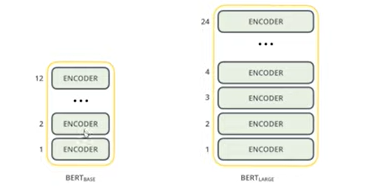

In [28]:
#Exploring the layer
# 2 sentences , 128 (max), 768 size embedding vector
bert_results['encoder_outputs'][0]

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.12901412,  0.00644755, -0.03614965, ...,  0.04999633,
          0.06149195, -0.02657555],
        [ 1.1753379 ,  1.2140787 ,  1.1569977 , ...,  0.11634361,
         -0.35855392, -0.40490174],
        [ 0.03859011,  0.53869987, -0.21089745, ...,  0.21858183,
          0.72601724, -1.1158607 ],
        ...,
        [-0.07587045, -0.2542191 ,  0.7075512 , ...,  0.50542   ,
         -0.18878683,  0.15028355],
        [-0.160666  , -0.28089684,  0.57597065, ...,  0.52758557,
         -0.1114136 ,  0.02887519],
        [-0.04428155, -0.20279573,  0.59093577, ...,  0.8133834 ,
         -0.390758  , -0.02601733]],

       [[ 0.17233288,  0.07162805, -0.02259207, ..., -0.01281068,
          0.03778928, -0.022087  ],
        [ 1.1120234 ,  1.1168654 ,  1.3797739 , ...,  0.3846931 ,
         -0.6988051 , -0.5431837 ],
        [ 0.32921016,  0.34521556, -0.5101262 , ...,  0.29178104,
         -0.33822832, -0.09487833],
        ...,

In [29]:
#The last vector is the sequential vector
bert_results['encoder_outputs'][-1]

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292067,  0.08567819,  0.14476839, ..., -0.09677105,
          0.08722159,  0.07711076],
        [ 0.17839423, -0.19006088,  0.5034951 , ..., -0.05869836,
          0.32717168, -0.15578607],
        [ 0.18701434, -0.43388814, -0.48875174, ..., -0.15502723,
          0.00145242, -0.24470958],
        ...,
        [ 0.12083033,  0.12884216,  0.4645349 , ...,  0.07375568,
          0.17441967,  0.16522148],
        [ 0.07967912, -0.01190673,  0.50225425, ...,  0.13777754,
          0.21002257,  0.00624568],
        [-0.07212678, -0.28303456,  0.5903342 , ...,  0.4755191 ,
          0.16668472, -0.08920309]],

       [[-0.09913606,  0.01595346, -0.04634067, ..., -0.16810721,
         -0.0738923 ,  0.05758078],
        [ 0.15735416, -0.5526499 ,  0.5439889 , ..., -0.26460272,
         -0.16227034,  0.104964  ],
        [-0.63261294, -0.5519903 , -0.38234076, ...,  0.285734  ,
         -0.11504608, -0.5958983 ],
        ...,

In [30]:
bert_results['encoder_outputs'][-1] == bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])>